In [11]:
from ultralytics import YOLO
import torch
from PIL import Image
from collections import Counter, defaultdict

In [2]:
# Check if MPS is available
if torch.backends.mps.is_available():
    print("MPS is available!")
else:
    print("MPS not available, using CPU.")

MPS is available!


In [21]:
# X-----Helper functions-----X
def displayImageInNb(results: list):
    # Get the result for the first image and plot it (returns a NumPy array)
    annotated_frame = results[0].plot()
    # Convert the NumPy array (BGR) to a PIL Image (RGB)
    image_with_boxes = Image.fromarray(annotated_frame[..., ::-1])

    # Display the image in the notebook
    return image_with_boxes


def getCountOfItems(results: list):
    # Get the dictionary of class names
    class_names = results[0].names

    # Get the list of predicted class IDs
    predicted_class_ids = results[0].boxes.cls.tolist()

    # Map the class IDs to class names
    predicted_class_names = [class_names[int(id)] for id in predicted_class_ids]

    # Count the occurrences of each class name
    object_counts = dict(Counter(predicted_class_names))
    
    return object_counts  
       

In [3]:
# Load your model
model = YOLO('models/best.pt')

In [4]:
# Run inference and explicitly tell it to use the MPS device (your GPU)
results = model('images/test_image.jpg')


image 1/1 /Users/patsondsouza/myStuff/LTD/floor-plan object enumerator/images/test_image.jpg: 480x640 3 baths, 4 beds, 7 chairs, 11 doors, 7 sinks, 1 sofa, 5 tables, 4 toilets, 138.6ms
Speed: 1.3ms preprocess, 138.6ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)


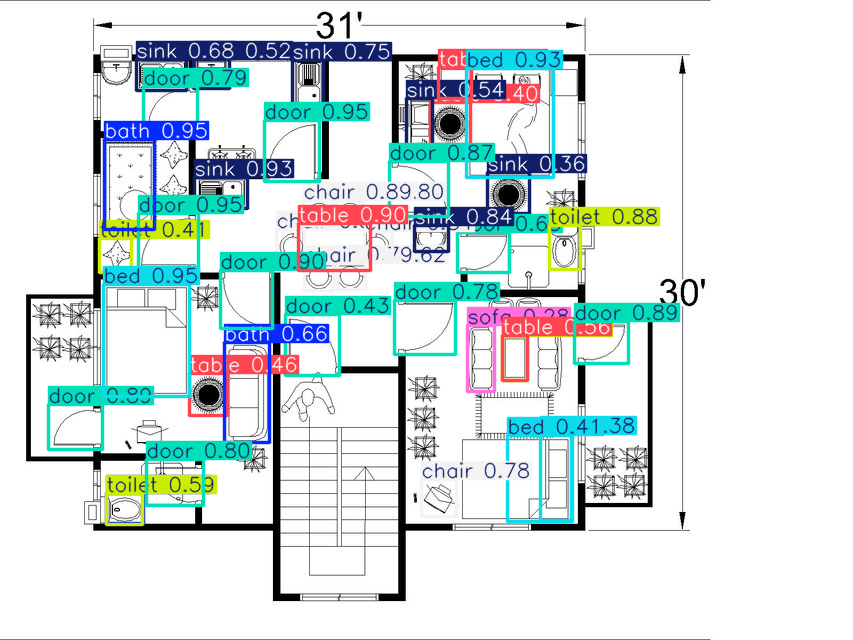

In [7]:
displayImageInNb(results)

In [22]:
getCountOfItems(results)

{'bed': 4,
 'bath': 3,
 'door': 11,
 'sink': 7,
 'table': 5,
 'chair': 7,
 'toilet': 4,
 'sofa': 1}